In [1]:
import sys

from omegaconf import OmegaConf
import torch

root_dir = "/home/mos/workshop/ProjectX"
sys.path.insert(0, root_dir)

from src.dataset.torch_dataset import XorDataset
from src.models.model import Xor
from src.utils.plotting import  plot_predictions

In [2]:
config_path = f"{root_dir}/configs/config_cpu.yaml"
hp = OmegaConf.load(config_path)
hp.dir_setting.root_dir = root_dir

model = Xor(hp)

experiment_date = "19-10-2023--16-59-33"
ckpt_name = "epoch=99-step=28100.ckpt"
lightning_sub_path = "lightning_logs/version_0/checkpoints"
ckpt_path = f"{root_dir}/{hp.logging.tb_log_dir}/{experiment_date}/{lightning_sub_path}/{ckpt_name}"

checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))

new_state_dict = dict()
for key, value in checkpoint["state_dict"].items():
    new_state_dict[key[6:]] = value

model.load_state_dict(new_state_dict)

model.eval()

Xor(
  (layer_1): Linear(in_features=2, out_features=2, bias=True)
  (act_1): Sigmoid()
  (layer_2): Linear(in_features=2, out_features=1, bias=True)
  (act_2): Sigmoid()
)

In [3]:
train_dataset = XorDataset(hp, mode='train')
valid_dataset = XorDataset(hp, mode='valid')

In [4]:
model.eval()
with torch.no_grad():
    y_pred_train = model(train_dataset.X).squeeze()
    y_pred_test = model(valid_dataset.X).squeeze()

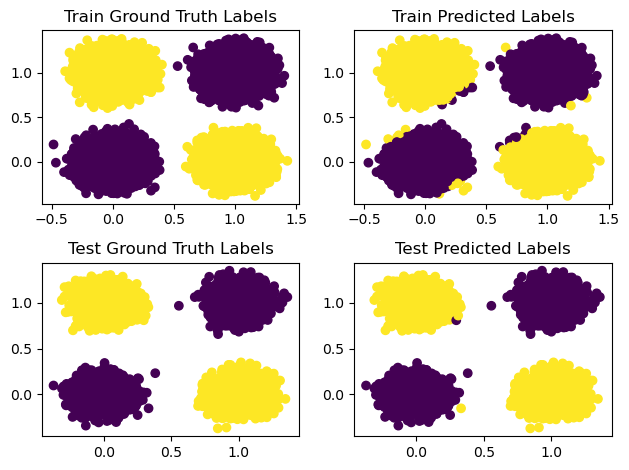

In [5]:
figure = plot_predictions(train_dataset, valid_dataset, y_pred_train, y_pred_test)